In [2]:
import pandas as pd
cl =  'clinical.tsv'
tc = 'TCGA_names.tsv'
samples = pd.read_csv(cl, sep='\t')
tcga = pd.read_csv(tc, sep='\t')

In [2]:
l = tcga['TCGA'].to_list()

In [3]:
samples
df = samples[samples['case_submitter_id'].isin(l)]
TCGA_n = df['case_submitter_id'].to_list()
stage = df['ajcc_pathologic_stage'].to_list()
d = {'TCGA':TCGA_n,'Stage':stage}
samples_d = pd.DataFrame(d, columns=['TCGA','Stage'])
samples_d = samples_d.drop_duplicates()
samples_d = samples_d.set_index('TCGA')
samples_d

,Stage
TCGA,
TCGA-AY-A69D,Stage IIA
TCGA-CA-6715,Stage IIIB
TCGA-G4-6304,Stage IIB
TCGA-A6-5660,Stage IIIC
TCGA-CK-5916,Stage I
...,...
TCGA-AA-3496,Stage II
TCGA-CM-6169,Stage IIA
TCGA-AZ-5403,Stage II


In [3]:
ca = 'CD44_samples_ca.tsv'
ca2 = 'CD44_samples_cancer.tsv'
cancer_samples = pd.read_csv(ca, sep='\t', index_col=0)
cancer_samples2 = pd.read_csv(ca2, sep='\t', index_col=0)
cancer_samples = cancer_samples.iloc[: , :-1]
cancer_samples2

,TCGA-3L-AA1B-01A-11R-A37K-07,TCGA-4N-A93T-01A-11R-A37K-07,TCGA-4T-AA8H-01A-11R-A41B-07,TCGA-5M-AAT4-01A-11R-A41B-07,TCGA-5M-AAT5-01A-21R-A41B-07,TCGA-5M-AAT6-01A-11R-A41B-07,TCGA-5M-AATA-01A-31R-A41B-07,TCGA-5M-AATE-01A-11R-A41B-07,TCGA-A6-2675-01A-02R-1723-07,TCGA-A6-2682-01A-01R-1410-07,...,TCGA-QG-A5YV-01A-11R-A28H-07,TCGA-QG-A5YW-01A-11R-A28H-07,TCGA-QG-A5YX-01A-11R-A28H-07,TCGA-QG-A5Z1-01A-11R-A28H-07,TCGA-QG-A5Z2-01A-11R-A28H-07,TCGA-QL-A97D-01A-12R-A41B-07,TCGA-RU-A8FL-01A-11R-A37K-07,TCGA-SS-A7HO-01A-21R-A37K-07,TCGA-T9-A92H-01A-11R-A37K-07,TCGA-WS-AB45-01A-11R-A41B-07
index,,,,,,,,,,,,,,,,,,,,,
uc001mvu,0.950712,0.336345,2.331796,2.483880,1.989445,2.497324,2.940802,1.401598,1.029766,0.350084,...,1.335911,1.582958,2.371179,1.288862,1.263251,2.847209,1.989669,0.379289,1.016407,0.171314
uc001mvv,3.704348,3.766474,4.982332,5.379274,5.364193,5.761687,4.411019,3.937066,4.970657,3.691098,...,5.479776,4.531852,4.706613,3.763282,5.039460,4.280040,5.985725,3.062162,5.512622,1.974949
uc001mvw,7.366710,6.710087,7.505748,7.487266,7.486145,6.463028,4.824345,7.220370,6.693658,6.408984,...,7.704587,7.669741,6.912728,7.026065,7.724677,7.189191,6.676762,5.313983,6.620176,3.177219
uc001mvx,3.841482,3.312447,2.724911,2.187861,2.572413,4.264318,2.906336,3.392005,4.809461,4.800948,...,3.688671,3.889337,2.841083,3.669614,4.182107,3.736324,2.702797,2.511881,3.108328,6.713858
uc001mwy,0.000000,7.014601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.056596,0.000000,0.000000,0.000000
uc001mwc,1.750955,0.000000,1.014677,0.000000,0.000000,2.097696,0.498838,0.000000,1.333784,2.284526,...,0.000000,2.082907,0.000000,1.442621,1.898757,0.844310,1.518185,0.000000,0.000000,4.401362
uc010rer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.883468,0.000000,0.000000


In [81]:
cancer_s2 = pd.melt(cancer_samples2)
stages = cancer_samples.loc['stages']
stages = stages.tolist()
#str1 = ' '.join(str(e) for e in stages)
#str1 = str1.replace("A", "").replace("B", "").replace("C", "")
cancer_s2['Stage'] = stages
#isoforms = ['CD44-208', 'CD44-206', 'CD44-209', 'CD44-201', 'CD44-203', 'CD44-210','CD44-205']*287
#cancer_s2['Iso'] = isoforms
#cancer_s2 = cancer_s2.rename(columns={"variable": "TCGA", "value": "Expression"})
#cancer_s2.to_csv('CD44_s2.csv', index=True)
cancer

"Stage I Stage III Stage II Stage IV nan Stage IV nan Stage II Stage II Stage IV Stage I Stage II Stage II Stage II Stage I Stage III Stage I Stage III Stage II Stage IV Stage III Stage II Stage II Stage III Stage III Stage I Stage II Stage II Stage IV Stage IV Stage III Stage II Stage III Stage IV Stage I Stage III Stage II Stage III Stage II Stage III Stage III Stage IV Stage III Stage III Stage II Stage II Stage I Stage II Stage I Stage I Stage II Stage II Stage I Stage II Stage II Stage IV Stage II Stage II Stage II Stage II Stage III Stage IV Stage III Stage III Stage II Stage IV Stage I Stage I Stage I Stage III Stage II '-- Stage III Stage III '-- '-- '-- Stage III Stage II Stage I Stage IV Stage II Stage II Stage I Stage IV Stage III Stage II Stage III Stage I Stage II Stage I Stage IV Stage I Stage II Stage IV Stage IV Stage III Stage IV Stage IV Stage IV Stage II Stage I Stage II Stage I Stage IV Stage II '-- Stage III Stage IV Stage IV Stage III Stage II Stage II Stage II St

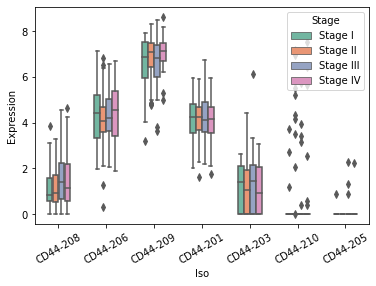

In [5]:
ca = 'CD44_s2.tsv'
cancer_s2 = pd.read_csv(ca, sep='\t', index_col=0)
import seaborn as sns
plot = sns.boxplot(y='Expression', x='Iso', 
                 data=cancer_s2, 
                 width=0.5,
                 palette="Set2", hue='Stage', hue_order=['Stage I', 'Stage II', 'Stage III', 'Stage IV'])

plot.set_xticklabels(labels=['CD44-208', 'CD44-206', 'CD44-209', 'CD44-201', 'CD44-203', 'CD44-210','CD44-205'], rotation=30)
plot.get_figure().savefig('CD44_iso_stages.png', dpi=300)